# Recortes:  2001 a 2003 e Países da UE, EUA e Canadá


## Hipótese 3: Localização tem relação com intermediação

### G : BW: GEO

#### Explicação:

Essa hipótese correlaciona o fato de possuir um alto betweenness (intermediação) com o número de países que fazem fronteira com o país em questão. Sendo assim, essa hipótese diz que quanto mais próximo de outros países é uma nação, ou seja, quanto maior o número de países com os qual faz fronteira, maior é o seu betweenness, indicando uma possibilidade de, por ser um país que faz divisa entre diversos outros, ele pode possuir um betweenness alto já que diversas pessoas iriam passar por ele para ir para outros países. 

#### Recorte:2001 a 2003 e países da União Europeia (UE) e da América Anglo-saxônica

Esse recorte foi pensado pois, ao analisarmos os anos de 2001 a 2003, com o ataque às Torres Gêmeas nos Estados Unidos, diversos países do planeta acabaram restrigindo o acesso às suas fronteiras, dificultando a entrada de pessoas, especialmente os países da UE e da América Anglo-saxônica. Com isso, com um acesso mais restrito às suas fronteiras, isso pode resultar numa diminuição do seu betweenness, mesmo que os países em questão tenham um alto número de vizinhos (GEO), deixando de corroborar com a hipótese 3.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import regression as reg

from scipy import stats
from matplotlib import pyplot as plt

import openpyxl

import netpixi
import cpnet

from graph_tool import spectral, centrality
from netpixi.integration.gt import *
from netpixi.integration.gt import Graph
from regression.integration.gt import *

In [2]:
data = pd.read_excel('./final_db.xlsx')
data

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


,Unnamed: 0.1,Unnamed: 0,country,idh_2000,idh_2001,idh_2002,idh_2003,idh_2004,idh_2005,idh_2006,...,rejected,betweenness,pop_cont,coreness,in_degree,out_degree,open,coreness_discreto,idh_2008_2012,idh_2001_2003
0,0,0,"China, Hong Kong SAR",0.830,0.838,0.845,0.854,0.865,0.874,0.886,...,7767,2.861034e-04,0,0.240278,830,16,9.654531,0,0.9050,0.845667
1,1,1,"China, Macao SAR",0.922,0.922,0.922,0.922,0.922,0.922,0.922,...,7,8.704008e-07,0,0.098611,10,3,58.823529,0,0.9220,0.922000
2,2,2,Afghanistan,0.350,0.353,0.384,0.393,0.409,0.418,0.429,...,243,2.351135e-03,0,0.120833,249,239198,50.609756,0,0.4690,0.376667
3,3,3,Albania,0.671,0.678,0.684,0.691,0.696,0.706,0.713,...,64,1.306107e-03,0,0.218056,158,14660,71.171171,0,0.7490,0.684333
4,4,4,Algeria,0.637,0.647,0.657,0.667,0.677,0.685,0.690,...,5511,5.926680e-03,0,0.222222,404,6174,6.830093,0,0.7180,0.657000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,220,220,Wallis and Futuna Islands,0.763,0.763,0.763,0.763,0.763,0.763,0.763,...,0,0.000000e+00,0,0.045833,0,0,0.000000,0,0.7630,0.763000
221,221,221,Western Sahara,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0.000000e+00,0,0.004167,0,473,0.000000,0,0.0000,0.000000
222,222,222,Yemen,0.444,0.453,0.461,0.470,0.477,0.483,0.488,...,5730,5.728203e-03,0,0.194444,11977,10037,67.639916,0,0.5026,0.461333
223,223,223,Zambia,0.425,0.432,0.441,0.451,0.460,0.471,0.482,...,2454,9.805704e-04,0,0.166667,8280,295,77.138066,0,0.5260,0.441333


In [3]:
df_completo = pd.read_csv('../Projeto-rascunho/asylum_seekers.csv')
df_completo

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/tmp/ipykernel_12/1764240694.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_completo = pd.read_csv('../Projeto-rascunho/asylum_seekers.csv')


,Year,Country / territory of asylum/residence,Origin,RSD procedure type / level,Tota pending start-year,of which UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total pending end-year,of which UNHCR-assisted(end-year)
0,2000,Zimbabwe,Afghanistan,G / FI,0,0,5,5,0,0,0,5.0,0,0
1,2000,South Africa,Afghanistan,G / FI,8,1,0,0,0,0,0,NaN,8,0
2,2000,Uzbekistan,Afghanistan,U / FI,265,265,2156,747,0,112,327,1186.0,1235,1235
3,2000,United States of America,Afghanistan,G / EO,196,0,225,151,0,31,68,250.0,171,0
4,2000,United States of America,Afghanistan,G / IN,193,0,218,182,0,51,40,273.0,150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129715,2016,United States of America,Zimbabwe,G / IN,232,NaN,229,16,NaN,*,10,28,435,NaN
129716,2016,United States of America,Zimbabwe,G / EO,142,NaN,12,*,NaN,*,23,31,138,NaN
129717,2016,South Africa,Zimbabwe,G / AR,94,9,NaN,NaN,NaN,NaN,94,94,0,NaN
129718,2016,South Africa,Zimbabwe,G / FI,41238,4124,7964,73,NaN,7869,NaN,7942,41260,NaN


In [4]:
df_aresta = df_completo.loc[:, ['Country / territory of asylum/residence', 'Origin', 'decisions_recognized', 'Rejected', 'Year']]
df_aresta = df_aresta.rename(columns={'Origin': 'origin', 'Country / territory of asylum/residence': 'destiny', 'decisions_recognized': 'value', 'Rejected': 'rejected','Year' : 'year'})
df_aresta

,destiny,origin,value,rejected,year
0,Zimbabwe,Afghanistan,5,0,2000
1,South Africa,Afghanistan,0,0,2000
2,Uzbekistan,Afghanistan,747,112,2000
3,United States of America,Afghanistan,151,31,2000
4,United States of America,Afghanistan,182,51,2000
...,...,...,...,...,...
129715,United States of America,Zimbabwe,16,*,2016
129716,United States of America,Zimbabwe,*,*,2016
129717,South Africa,Zimbabwe,NaN,NaN,2016
129718,South Africa,Zimbabwe,73,7869,2016


In [5]:
df_aresta.value = pd.to_numeric(df_aresta['value'], errors = 'coerce').fillna(0)
df_aresta

,destiny,origin,value,rejected,year
0,Zimbabwe,Afghanistan,5.0,0,2000
1,South Africa,Afghanistan,0.0,0,2000
2,Uzbekistan,Afghanistan,747.0,112,2000
3,United States of America,Afghanistan,151.0,31,2000
4,United States of America,Afghanistan,182.0,51,2000
...,...,...,...,...,...
129715,United States of America,Zimbabwe,16.0,*,2016
129716,United States of America,Zimbabwe,0.0,*,2016
129717,South Africa,Zimbabwe,0.0,NaN,2016
129718,South Africa,Zimbabwe,73.0,7869,2016


#### Recorte pelos anos

Abaixo, realizamos o recorte da base de dados de acordo com os anos propostos no recorte (2001 a 2003).

In [6]:
df_aresta_2001_2003 = df_aresta[((df_aresta['year'] == 2001) | (df_aresta['year'] == 2002) | (df_aresta['year'] == 2003))]
df_aresta_2001_2003

,destiny,origin,value,rejected,year
5153,South Africa,Afghanistan,0.0,0,2001
5154,South Africa,Afghanistan,5.0,2,2001
5155,Uzbekistan,Afghanistan,1573.0,247,2001
5156,United States of America,Afghanistan,129.0,27,2001
5157,United States of America,Afghanistan,212.0,43,2001
...,...,...,...,...,...
22911,Ukraine,Zimbabwe,0.0,2,2003
22912,Ukraine,Zimbabwe,0.0,1,2003
22913,United States of America,Zimbabwe,115.0,160,2003
22914,United States of America,Zimbabwe,54.0,72,2003


In [7]:
df_aresta_2001_2003 = df_aresta_2001_2003.drop('year', axis=1)

In [8]:
df_aresta_2001_2003.value = df_aresta_2001_2003['value'].astype(int)
df_aresta_2001_2003.rejected = df_aresta_2001_2003['rejected'].astype(int)

In [9]:
df_aresta_2001_2003.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17763 entries, 5153 to 22915
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   destiny   17763 non-null  object
 1   origin    17763 non-null  object
 2   value     17763 non-null  int64 
 3   rejected  17763 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 693.9+ KB


In [10]:
paises_eu_america =  pd.read_csv('./eu_america.csv')
lista_paises_eu_america = paises_eu_america['EU_North_America'].to_list()
lista_paises_eu_america

['Austria',
 'Belgium',
 'Bulgaria',
 'Canada',
 'Czech Rep.',
 'Cyprus',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'United States of America']

Tabela filtrada com anos de 2001-2003 e países da África em lista.

Agora vamos calcular o coreness desse ano e depois analisar para a região da África.

In [11]:
listaVertices = []

listaVertices = set(df_completo['Country / territory of asylum/residence'].unique().tolist() + df_completo['Origin'].unique().tolist())

print(len(listaVertices))

225


Primeiro vamos calcular o betweenness para esse intervalo de anos, mas para isso precisamos do grafo:

In [12]:
# Criando um grafo não-dirigido
g = Graph(directed=True) 
g.add_vp('nome')
g.add_ep('aceitos')

In [13]:
for vertice in listaVertices:
    g.add_vertex(vertice)

In [14]:
for v in g.all_vertices():
    v['nome'] = str(v)

In [15]:
n = g.num_vertices()
print('O número de vértices do grafo é :', n)

O número de vértices do grafo é : 225


Selecionando dados em que o destino e a origem são diferentes:

In [16]:
df_aresta_2001_2003 = df_aresta_2001_2003[df_aresta_2001_2003['origin'] != df_aresta_2001_2003['destiny']]
df_aresta_2001_2003

,destiny,origin,value,rejected
5153,South Africa,Afghanistan,0,0
5154,South Africa,Afghanistan,5,2
5155,Uzbekistan,Afghanistan,1573,247
5156,United States of America,Afghanistan,129,27
5157,United States of America,Afghanistan,212,43
...,...,...,...,...
22911,Ukraine,Zimbabwe,0,2
22912,Ukraine,Zimbabwe,0,1
22913,United States of America,Zimbabwe,115,160
22914,United States of America,Zimbabwe,54,72


Agora vamos somar os valores nas quais os pares de países de origem e destino são os mesmos:

In [17]:
df_aresta_2001_2003 = df_aresta_2001_2003.groupby(['origin', 'destiny']).sum().reset_index()
df_aresta_2001_2003

,origin,destiny,value,rejected
0,Afghanistan,Angola,0,2
1,Afghanistan,Argentina,0,0
2,Afghanistan,Armenia,0,4
3,Afghanistan,Australia,2192,757
4,Afghanistan,Austria,1034,811
...,...,...,...,...
5845,Zimbabwe,Switzerland,0,17
5846,Zimbabwe,Thailand,0,0
5847,Zimbabwe,Ukraine,0,3
5848,Zimbabwe,United Kingdom,5490,12256


In [18]:
for index, row in df_aresta_2001_2003.iterrows():
    g.add_edge(row.origin, row.destiny)
    g.get_edge(row.origin, row.destiny)['aceitos'] = row.value

In [19]:
gt_save(g, '/grafo_2001_2003.net.gz')

In [20]:
g = gt_load('/grafo_2001_2003.net.gz')

In [21]:
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'grafo_2001_2003.net.gz')

In [22]:
r = netpixi.render('grafo_2001_2003.net.gz', infinite=True);

In [23]:
r.vertex_set_key('nome')

r.vertex_default(color=0xffffff)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x20B2AA)

r.edge_scale('aceitos', 1, 10)

In [24]:
bc_completo, _ = centrality.betweenness(g)
g.add_vp('betweenness', bc_completo)

In [25]:
df_betweenness_2001_2003 = gt_data(g).sort_values("betweenness", ascending = False)
df_betweenness_2001_2003

,nome,betweenness
id,,
United States of America,United States of America,0.105584
China,China,0.073186
Kenya,Kenya,0.035235
Australia,Australia,0.033659
Spain,Spain,0.027726
...,...,...
Solomon Islands,Solomon Islands,0.000000
Dominican Rep.,Dominican Rep.,0.000000
Dominica,Dominica,0.000000


In [26]:
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'centralidadeBetweeness20012003.net.gz')

In [27]:
r.vertex_scale('betweenness', 5, 25)

In [28]:
r = netpixi.render('centralidadeBetweeness20012003.net.gz', infinite=True);

In [29]:
r.edge_scale('aceitos', 1, 10)

r.vertex_set_key('nome')

r.vertex_scale('betweenness', 5, 25)

In [30]:
data_idh_2001_2003 = data.loc[:, ['idh_2001_2003', 'country', 'n_neightbours']]
data_idh_2001_2003

,idh_2001_2003,country,n_neightbours
0,0.845667,"China, Hong Kong SAR",1
1,0.922000,"China, Macao SAR",1
2,0.376667,Afghanistan,6
3,0.684333,Albania,4
4,0.657000,Algeria,7
...,...,...,...
220,0.763000,Wallis and Futuna Islands,0
221,0.000000,Western Sahara,3
222,0.461333,Yemen,2
223,0.441333,Zambia,8


In [31]:
data_idh_2001_2003 = data_idh_2001_2003.rename(columns={'idh_2001_2003': 'idh_2001_2003', 'country': 'origin'})
df_betweenness_2001_2003 = df_betweenness_2001_2003.rename(columns={'nome':'origin'})
df_betweenness_2001_2003

,origin,betweenness
id,,
United States of America,United States of America,0.105584
China,China,0.073186
Kenya,Kenya,0.035235
Australia,Australia,0.033659
Spain,Spain,0.027726
...,...,...
Solomon Islands,Solomon Islands,0.000000
Dominican Rep.,Dominican Rep.,0.000000
Dominica,Dominica,0.000000


In [32]:
df_betweenness_2001_2003 = df_betweenness_2001_2003.merge(data_idh_2001_2003, on="origin", how="left")
df_betweenness_2001_2003

,origin,betweenness,idh_2001_2003,n_neightbours
0,United States of America,0.105584,0.891333,2
1,China,0.073186,0.606667,16
2,Kenya,0.035235,0.469333,5
3,Australia,0.033659,0.907000,0
4,Spain,0.027726,0.837333,5
...,...,...,...,...
220,Solomon Islands,0.000000,0.486000,0
221,Dominican Rep.,0.000000,0.666667,1
222,Dominica,0.000000,0.708667,0
223,Guadeloupe,0.000000,0.853000,0


In [33]:
df_filtrado_idh_2001_2003 = df_betweenness_2001_2003[(df_betweenness_2001_2003['origin'].isin(lista_paises_eu_america))]
df_filtrado_idh_2001_2003

,origin,betweenness,idh_2001_2003,n_neightbours
0,United States of America,0.105584,0.891333,2
4,Spain,0.027726,0.837333,5
8,Romania,0.020640,0.730667,5
17,Canada,0.012983,0.876667,1
20,Germany,0.010186,0.890000,9
25,Portugal,0.008837,0.800667,1
28,Lithuania,0.008325,0.785333,4
32,Bulgaria,0.007595,0.737000,5
33,Hungary,0.007172,0.788667,7
34,Netherlands,0.006945,0.887000,2


#### Regressão

Com os resultados obtidos no processo acima, obtivemos a tabela logo acima dessa célula, a df_filtrado_idh_2001_2003, correlacionando o valor do betweenness com o recorte proposto e, para podermos analisar se o recorte realmente faz sentido e faria com que a hipótese não corroborasse mais, precisamos realizar uma regressão linear, uma vez que a variável dependente (betweenness) é um valor contínuo (métrica).

In [34]:
result_hip3 = reg.linear(data=df_filtrado_idh_2001_2003, formula='betweenness ~ n_neightbours')
result_hip3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            betweenness   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                   0.09234
Date:                Sat, 19 Nov 2022   Prob (F-statistic):              0.764
Time:                        11:37:03   Log-Likelihood:                 70.326
No. Observations:                  28   AIC:                            -136.7
Df Residuals:                      26   BIC:                            -134.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0108      0.007      1.518      0.141      -0.004       0.025
n_neightbours    -0.0005      0.002     -0.304      0.764      -0.004       0.003
==============================================================================
Omnibus:                       58.176   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.319
Skew:                           4.134   Prob(JB):                     2.67e-93
Kurtosis:                      20.235   Cond. No.                         8.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
result_hip3.nano_summary()

-0.000 (0.002)


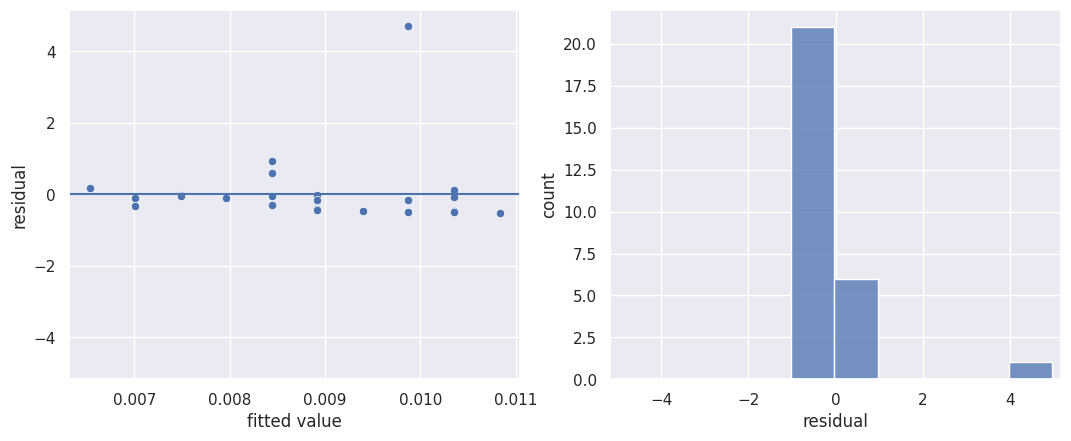

In [36]:
result_hip3.plot_residuals()

#### Conclusão:

A partir dos resultados obtidos acima, podemos concluir que a hipótese deixou de corroborar para o recorte proposto, perdendo totalmente significância (valor-p).

Dessa forma, podemos concluir que o recorte fez com que a hipótese deixasse de corroborar por conta justamente do pensamento apresentado no início do recorte proposto. Ou seja, com o ataque às Torres Gêmeas em 2001, os países da UE e da América Anglo-Saxônica restrigiram muito as suas fronteiras, resultando em uma grande diminuição da sua intermediação/betweenness e, assim, deixando de corroborar com a hipótese 3.

## Hipótese 4: Desenvolvimento e vazão de pessoas

### C: DSV, CONP, CORE = EXT

In [37]:
df_aresta_2001_2003

,origin,destiny,value,rejected
0,Afghanistan,Angola,0,2
1,Afghanistan,Argentina,0,0
2,Afghanistan,Armenia,0,4
3,Afghanistan,Australia,2192,757
4,Afghanistan,Austria,1034,811
...,...,...,...,...
5845,Zimbabwe,Switzerland,0,17
5846,Zimbabwe,Thailand,0,0
5847,Zimbabwe,Ukraine,0,3
5848,Zimbabwe,United Kingdom,5490,12256


Vamos começar calculando o coreness e depois calcularemos o out-degree que é 

In [38]:
df_out_degree_2001_2003 = df_aresta_2001_2003.groupby('origin').sum().reindex(listaVertices).fillna(0)
df_out_degree_2001_2003.sort_values("value", ascending = False)

/tmp/ipykernel_12/2799065956.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_out_degree_2001_2003 = df_aresta_2001_2003.groupby('origin').sum().reindex(listaVertices).fillna(0)


,value,rejected
origin,,
Dem. Rep. of the Congo,31364.0,41184.0
Rwanda,30452.0,5293.0
Iraq,30435.0,90068.0
Sudan,27901.0,24182.0
Afghanistan,25822.0,49943.0
...,...,...
Gibraltar,0.0,2.0
Malta,0.0,5.0
Micronesia (Federated States of),0.0,0.0


In [39]:
df_out_degree_2001_2003 = df_out_degree_2001_2003.drop('rejected', axis=1)

In [40]:
df_out_degree_2001_2003 = df_out_degree_2001_2003.rename(columns={'origin': 'origin', 'value':'out_degree'})
df_out_degree_2001_2003

,out_degree
origin,
Tuvalu,0.0
Syrian Arab Rep.,1583.0
China,18568.0
Denmark,0.0
Nauru,0.0
...,...
Austria,0.0
Djibouti,138.0
Seychelles,25.0


In [41]:
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'centralidadeCoreness20012003.net.gz')

In [42]:
r = netpixi.render('centralidadeCoreness20012003.net.gz')

In [44]:
matrix = spectral.adjacency(g)

algorithm = cpnet.Lip()
algorithm.detect(matrix)
c = algorithm.get_coreness()

g.add_vp('coreness')
for i, coreness in c.items():
    v = g.get_vertex_by_index(i)
    v['coreness'] = int(coreness)
    
for v in g.all_vertices():
    if v['coreness'] == 1:
        r.vertex(v['id'], color=0xff0000)
    else:
        r.vertex(v['id'], color=0x00ff00)

# # Quando a execução desta célula terminar,
# # veja como ficou a visualização acima.

In [45]:
r.edge_scale('aceitos', 1, 10)

r.vertex_set_key('nome')

r.vertex_scale('coreness', 5, 25)

In [76]:
df_coreness_2001_2003 = gt_data(g).sort_values("coreness", ascending = False)
df_coreness_2001_2003

,nome,betweenness,coreness
id,,,
Ireland,Ireland,0.001022,1
Indonesia,Indonesia,0.006653,1
Germany,Germany,0.010186,1
New Zealand,New Zealand,0.003000,1
"China, Hong Kong SAR","China, Hong Kong SAR",0.000132,1
...,...,...,...
Cuba,Cuba,0.013300,0
Lao People's Dem. Rep.,Lao People's Dem. Rep.,0.000000,0
Central African Rep.,Central African Rep.,0.000764,0


In [77]:
df_coreness_2001_2003 = df_coreness_2001_2003.rename(columns={'nome': 'origin'})

df_coreness_outdegree = df_coreness_2001_2003.merge(df_out_degree_2001_2003, on = "origin" )

df_coreness_outdegree

,origin,betweenness,coreness,out_degree
0,Ireland,0.001022,1,0.0
1,Indonesia,0.006653,1,2070.0
2,Germany,0.010186,1,22.0
3,New Zealand,0.003000,1,0.0
4,"China, Hong Kong SAR",0.000132,1,6.0
...,...,...,...,...
220,Cuba,0.013300,0,1029.0
221,Lao People's Dem. Rep.,0.000000,0,145.0
222,Central African Rep.,0.000764,0,2561.0
223,Gibraltar,0.000000,0,0.0


In [78]:
conp_idh_2001_2003 =  data.loc[:, ['pop_cont', 'country', 'idh_2001_2003']]
#conp_idh_2001_2003['idh_2001_2003'] = (data_conp_dsv_2001_2003['idh_2003'] + data_conp_dsv_2001_2003['idh_2002'] + data_conp_dsv_2001_2003['idh_2001']) /3
#conp_idh_2001_2003['idh_2001_2003'] = conp_idh_2001_2003['idh_2001_2003'].fillna(0)
conp_idh_2001_2003 = conp_idh_2001_2003.rename(columns={'country': 'origin'})

conp_idh_2001_2003


,pop_cont,origin,idh_2001_2003
0,0,"China, Hong Kong SAR",0.845667
1,0,"China, Macao SAR",0.922000
2,0,Afghanistan,0.376667
3,0,Albania,0.684333
4,0,Algeria,0.657000
...,...,...,...
220,0,Wallis and Futuna Islands,0.763000
221,0,Western Sahara,0.000000
222,0,Yemen,0.461333
223,0,Zambia,0.441333


In [79]:
df_completo_hip4 = conp_idh_2001_2003.merge(df_coreness_outdegree, on = "origin" )
df_completo_hip4

,pop_cont,origin,idh_2001_2003,betweenness,coreness,out_degree
0,0,"China, Hong Kong SAR",0.845667,0.000132,1,6.0
1,0,"China, Macao SAR",0.922000,0.000000,0,2.0
2,0,Afghanistan,0.376667,0.003862,0,25822.0
3,0,Albania,0.684333,0.004174,0,4394.0
4,0,Algeria,0.657000,0.015018,0,2242.0
...,...,...,...,...,...,...
220,0,Wallis and Futuna Islands,0.763000,0.000000,0,0.0
221,0,Western Sahara,0.000000,0.000000,0,1.0
222,0,Yemen,0.461333,0.005162,0,312.0
223,0,Zambia,0.441333,0.000073,0,65.0


In [80]:
df_completo_filtrado_hip4 = df_completo_hip4[(df_completo_hip4['origin'].isin(lista_paises_eu_america))]
df_completo_filtrado_hip4

,pop_cont,origin,idh_2001_2003,betweenness,coreness,out_degree
14,0,Austria,0.851667,0.000543,1,0.0
21,0,Belgium,0.886000,0.005499,1,8.0
33,0,Bulgaria,0.737000,0.007595,1,683.0
39,0,Canada,0.876667,0.012983,1,9.0
54,0,Cyprus,0.819000,0.000009,1,1.0
55,1,Czech Rep.,0.821667,0.000141,0,230.0
58,0,Denmark,0.891333,0.000222,1,0.0
67,0,Estonia,0.805000,0.000126,0,67.0
70,0,Finland,0.874000,0.000156,1,1.0
71,0,France,0.852667,0.004757,1,17.0


#### Regressão

Com os resultados obtidos no processo acima, obtivemos a tabela logo acima dessa célula, a df_completo_filtrado_hip4, correlacionando o valor do coreness, idh, pop_cont e out_degree com o recorte proposto e, para podermos analisar se o recorte realmente faz sentido e faria com que a hipótese não corroborasse mais, precisamos realizar uma regressão linear, uma vez que a variável dependente (out_degree) embora seja um valor discreto tem uma vasta gama de valores.

In [81]:
#DSV, CONP, CORE = EXT
result_hip4 = reg.linear(data=df_completo_filtrado_hip4, formula='np.log1p(out_degree) ~ pop_cont + coreness + idh_2001_2003')
result_hip4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log1p(out_degree)   R-squared:                       0.541
Model:                              OLS   Adj. R-squared:                  0.483
Method:                   Least Squares   F-statistic:                     9.413
Date:                  Sat, 19 Nov 2022   Prob (F-statistic):           0.000270
Time:                          12:01:25   Log-Likelihood:                -51.114
No. Observations:                    28   AIC:                             110.2
Df Residuals:                        24   BIC:                             115.6
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        28.3531      5.390      5.260      0.000      17.229      39.478
pop_cont          2.0563      1.888      1.089      0.287      -1.841       5.954
coreness         -0.5261      1.060     -0.496      0.624      -2.714       1.662
idh_2001_2003   -30.3859      6.755     -4.498      0.000     -44.328     -16.444
==============================================================================
Omnibus:                        0.394   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.821   Jarque-Bera (JB):                0.429
Skew:                          -0.248   Prob(JB):                        0.807
Kurtosis:                       2.651   Cond. No.                         44.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
result_hip4.nano_summary()

+02.056 (1.888)
-00.526 (1.060)
-30.386 (6.755) ***


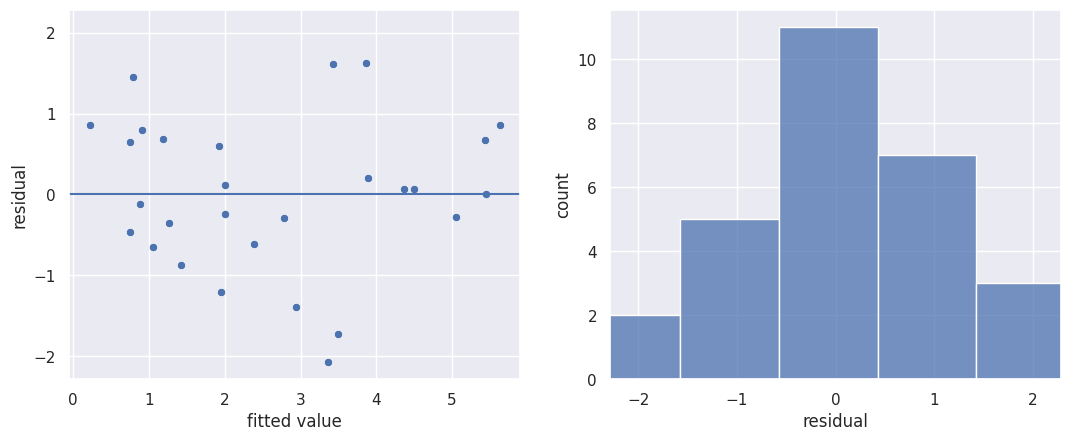

In [83]:
result_hip4.plot_residuals()

## Hipótese 2: Localização e coreness

### C:GEO = CORE



In [88]:
df_neighbours_origin = df_betweenness_2001_2003.drop(['betweenness', 'idh_2001_2003'], axis=1)
df_neighbours_origin

,origin,n_neightbours
0,United States of America,2
1,China,16
2,Kenya,5
3,Australia,0
4,Spain,5
...,...,...
220,Solomon Islands,0
221,Dominican Rep.,1
222,Dominica,0
223,Guadeloupe,0


In [90]:
df_coreness = df_coreness_outdegree.drop(['betweenness', 'out_degree'], axis=1)
df_coreness

,origin,coreness
0,Ireland,1
1,Indonesia,1
2,Germany,1
3,New Zealand,1
4,"China, Hong Kong SAR",1
...,...,...
220,Cuba,0
221,Lao People's Dem. Rep.,0
222,Central African Rep.,0
223,Gibraltar,0


In [91]:
neighbours_coreness = df_neighbours_origin.merge(df_coreness, on="origin", how="left")
neighbours_coreness

,origin,n_neightbours,coreness
0,United States of America,2,1
1,China,16,0
2,Kenya,5,0
3,Australia,0,1
4,Spain,5,1
...,...,...,...
220,Solomon Islands,0,0
221,Dominican Rep.,1,0
222,Dominica,0,0
223,Guadeloupe,0,0


In [93]:
df_completo_filtrado_hip2 = neighbours_coreness[(neighbours_coreness['origin'].isin(lista_paises_eu_america))]
df_completo_filtrado_hip2

,origin,n_neightbours,coreness
0,United States of America,2,1
4,Spain,5,1
8,Romania,5,1
17,Canada,1,1
20,Germany,9,1
25,Portugal,1,1
28,Lithuania,4,0
32,Bulgaria,5,1
33,Hungary,7,1
34,Netherlands,2,1


#### Regressão

Com os resultados obtidos no processo acima, obtivemos a tabela logo acima dessa célula, a df_completo_filtrado_hip2, correlacionando o valor do coreness, e localização com o recorte proposto e, para podermos analisar se o recorte realmente faz sentido e faria com que a hipótese não corroborasse mais, precisamos realizar uma regressão logística, uma vez que a variável dependente (coreness) é um valor discreto.

In [94]:
#GEO = CORE
result_hip2 = reg.logistic(data=df_completo_filtrado_hip2, formula='coreness ~ n_neightbours')
result_hip2.summary()

Optimization terminated successfully.
         Current function value: 0.408661
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               coreness   No. Observations:                   28
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Nov 2022   Pseudo R-squ.:                0.003548
Time:                        12:08:48   Log-Likelihood:                -11.443
converged:                       True   LL-Null:                       -11.483
Covariance Type:            nonrobust   LLR p-value:                    0.7753
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.5563      0.968      1.608      0.108      -0.340       3.453
n_neightbours     0.0639      0.226      0.283      0.777      -0.379       0.507
=================================================================================
"""

In [96]:
result_hip2.nano_summary()

+0.064 (0.226)


50.0% of average residuals inside


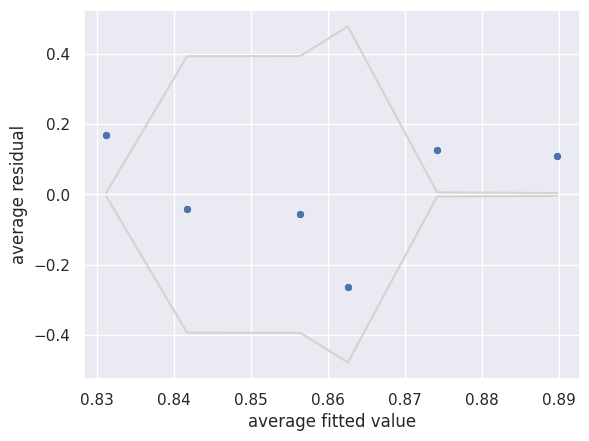

In [97]:
result_hip2.plot_residuals()

# Sem recorte

## Hipótese 2:

### C: GEO = CORE


In [98]:
neighbours_coreness

,origin,n_neightbours,coreness
0,United States of America,2,1
1,China,16,0
2,Kenya,5,0
3,Australia,0,1
4,Spain,5,1
...,...,...,...
220,Solomon Islands,0,0
221,Dominican Rep.,1,0
222,Dominica,0,0
223,Guadeloupe,0,0


In [99]:
#GEO = CORE
result_hip2_sem_recorte = reg.logistic(data=neighbours_coreness, formula='coreness ~ n_neightbours')
result_hip2_sem_recorte.summary()

Optimization terminated successfully.
         Current function value: 0.476047
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               coreness   No. Observations:                  225
Model:                          Logit   Df Residuals:                      223
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Nov 2022   Pseudo R-squ.:                 0.03669
Time:                        12:21:30   Log-Likelihood:                -107.11
converged:                       True   LL-Null:                       -111.19
Covariance Type:            nonrobust   LLR p-value:                  0.004284
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.9622      0.273     -7.185      0.000      -2.497      -1.427
n_neightbours     0.1698      0.060      2.821      0.005       0.052       0.288
=================================================================================
"""

In [100]:
result_hip2_sem_recorte.nano_summary()

+0.170 (0.060) ***
